In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [24]:
path = 'data_2.csv'
data_path = path
data = pd.read_csv(data_path)
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Experience_Level,Calories_Burned
0,56,Male,88.3,1.71,180,157,60,1.69,Yoga,3,1313
1,46,Female,74.9,1.53,179,151,66,1.30,HIIT,2,883
2,32,Female,68.1,1.66,167,122,54,1.11,Cardio,2,677
3,25,Male,53.2,1.70,190,164,56,0.59,Strength,1,532
4,38,Male,46.1,1.79,188,158,68,0.64,Strength,1,556


In [25]:
print("Missing values check:")
print(data.isnull().sum())

Missing values check:
Age                         0
Gender                      0
Weight (kg)                 0
Height (m)                  0
Max_BPM                     0
Avg_BPM                     0
Resting_BPM                 0
Session_Duration (hours)    0
Workout_Type                0
Experience_Level            0
Calories_Burned             0
dtype: int64


In [26]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Age, Gender, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Workout_Type, Experience_Level, Calories_Burned]
Index: []


In [27]:
# Data type analysis
print(f"\nData types:")
print(data.dtypes)


Data types:
Age                           int64
Gender                       object
Weight (kg)                 float64
Height (m)                  float64
Max_BPM                       int64
Avg_BPM                       int64
Resting_BPM                   int64
Session_Duration (hours)    float64
Workout_Type                 object
Experience_Level              int64
Calories_Burned               int64
dtype: object


In [28]:
data.replace({"Gender":{'Male':0,'Female':1}}, inplace=True)
data.replace({"Workout_Type":{'Yoga':0,'HIIT':1,'Cardio':2,'Strength':3}}, inplace=True)

In [29]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Experience_Level,Calories_Burned
0,56,0,88.3,1.71,180,157,60,1.69,0,3,1313
1,46,1,74.9,1.53,179,151,66,1.30,1,2,883
2,32,1,68.1,1.66,167,122,54,1.11,2,2,677
3,25,0,53.2,1.70,190,164,56,0.59,3,1,532
4,38,0,46.1,1.79,188,158,68,0.64,3,1,556


In [30]:
data['Max_BPM_Range'] = data['Max_BPM'] - data['Resting_BPM']
data['Avg_BPM_Range'] = data['Avg_BPM'] - data['Resting_BPM']

In [31]:
df = data.drop(["Max_BPM", "Avg_BPM","Resting_BPM"], axis=1)

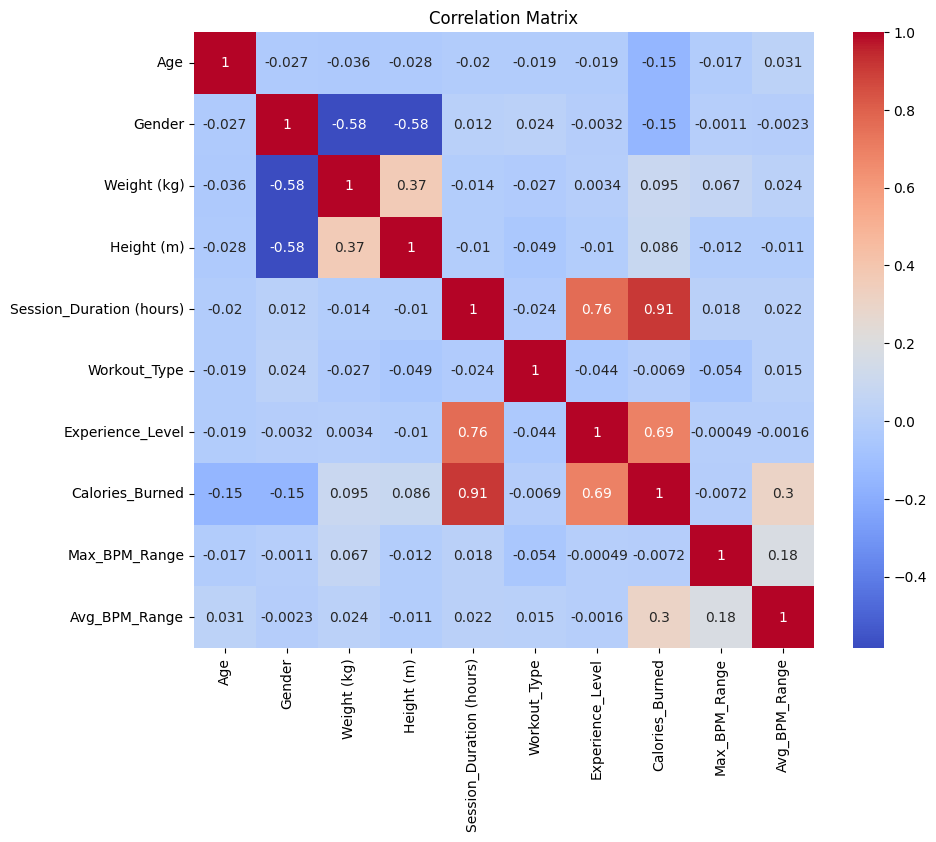

In [32]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [33]:
features = ['Gender', 'Age', 'Height (m)', 'Weight (kg)', 'Session_Duration (hours)','Avg_BPM_Range','Max_BPM_Range', 'Workout_Type', 'Experience_Level']
X = data[features]
y = data["Calories_Burned"]

In [34]:
print(X)


     Gender  Age  Height (m)  Weight (kg)  Session_Duration (hours)  \
0         0   56        1.71         88.3                      1.69   
1         1   46        1.53         74.9                      1.30   
2         1   32        1.66         68.1                      1.11   
3         0   25        1.70         53.2                      0.59   
4         0   38        1.79         46.1                      0.64   
..      ...  ...         ...          ...                       ...   
968       0   24        1.74         87.1                      1.57   
969       0   25        1.61         66.6                      1.38   
970       1   59        1.76         60.4                      1.72   
971       0   32        1.83        126.4                      1.10   
972       0   46        1.63         88.7                      0.75   

     Avg_BPM_Range  Max_BPM_Range  Workout_Type  Experience_Level  
0               97            120             0                 3  
1          

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression

In [36]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [37]:
lr_pred = lr_model.predict(X_test)

In [42]:
#Calculate metrics
lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)

print(f"\nlinear regression Performance:")
print(f"R² Score: {lr_r2:.4f}")
print(f"RMSE: {lr_rmse:.2f} calories")
print(f"MAE: {lr_mae:.2f} calories")


linear regression Performance:
R² Score: 0.9667
RMSE: 52.71 calories
MAE: 41.55 calories


In [43]:
# Cross-validation
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
print(f"\nCross-Validation R² Scores: {lr_cv_scores}")
print(f"Mean CV R²: {lr_cv_scores.mean():.3f} (+/- {lr_cv_scores.std() * 2:.3f})")


Cross-Validation R² Scores: [0.95835629 0.94919042 0.95581492 0.95996812 0.95069522]
Mean CV R²: 0.955 (+/- 0.008)


In [44]:
# Feature coefficients
lr_coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\nFEATURE COEFFICIENTS:")
for idx, row in lr_coefficients.iterrows():
    print(f"- {row['Feature']}: {row['Coefficient']:.3f}")


FEATURE COEFFICIENTS:
- Session_Duration (hours): 721.342
- Gender: -88.049
- Height (m): -9.262
- Avg_BPM_Range: 5.114
- Age: -3.263
- Workout_Type: 1.826
- Experience_Level: 1.673
- Max_BPM_Range: -1.643
- Weight (kg): 0.107


#Random Forest Regressor

In [45]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [46]:
#Calculate metrics
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)

print(f"\nRandom Forest Performance:")
print(f"R² Score: {rf_r2:.4f}")
print(f"RMSE: {rf_rmse:.2f} calories")
print(f"MAE: {rf_mae:.2f} calories")


Random Forest Performance:
R² Score: 0.9547
RMSE: 61.50 calories
MAE: 47.74 calories


In [47]:
# Cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"\nCross-Validation R² Scores: {rf_cv_scores}")
print(f"Mean CV R²: {rf_cv_scores.mean():.3f} (+/- {rf_cv_scores.std() * 2:.3f})")


Cross-Validation R² Scores: [0.95457363 0.94086459 0.94210251 0.95120813 0.94310811]
Mean CV R²: 0.946 (+/- 0.011)


In [48]:
rf_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nFEATURE IMPORTANCE:")
for idx, row in rf_importance.iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.3f}")


FEATURE IMPORTANCE:
- Session_Duration (hours): 0.847
- Avg_BPM_Range: 0.083
- Age: 0.025
- Gender: 0.015
- Weight (kg): 0.011
- Height (m): 0.009
- Max_BPM_Range: 0.008
- Workout_Type: 0.003
- Experience_Level: 0.001


In [49]:
# Hyperparameter tuning for Random Forest
print("\nHyperparameter Tuning for Random Forest...")
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best CV score: {rf_grid.best_score_:.4f}")


Hyperparameter Tuning for Random Forest...
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.9464


In [50]:
# Evaluate tuned model
rf_tuned_pred = rf_grid.predict(X_test)
rf_tuned_r2 = r2_score(y_test, rf_tuned_pred)
rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, rf_tuned_pred))

print(f"Tuned Random Forest R²: {rf_tuned_r2:.4f}")
print(f"Tuned Random Forest RMSE: {rf_tuned_rmse:.2f}")
print(f"Improvement: {rf_tuned_r2 - rf_r2:.4f}")

Tuned Random Forest R²: 0.9547
Tuned Random Forest RMSE: 61.50
Improvement: 0.0000


# Gradient Boosting Regressor

In [51]:
# Gradient Boosting with basic parameters
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [52]:
# Calculate metrics
gb_r2 = r2_score(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2')

print(f"\nGradient Boosting Performance:")
print(f"R² Score: {gb_r2:.4f}")
print(f"RMSE: {gb_rmse:.2f} calories")
print(f"MAE: {gb_mae:.2f} calories")
print(f"Cross-validation R²: {gb_cv_scores.mean():.4f} ± {gb_cv_scores.std():.4f}")


Gradient Boosting Performance:
R² Score: 0.9779
RMSE: 42.92 calories
MAE: 34.13 calories
Cross-validation R²: 0.9711 ± 0.0040


In [53]:
# Hyperparameter tuning for Gradient Boosting
print("\nHyperparameter Tuning for Gradient Boosting...")
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
gb_grid.fit(X_train, y_train)

print(f"Best parameters: {gb_grid.best_params_}")
print(f"Best CV score: {gb_grid.best_score_:.4f}")



Hyperparameter Tuning for Gradient Boosting...
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best CV score: 0.9720


In [54]:
# Evaluate tuned model
gb_tuned_pred = gb_grid.predict(X_test)
gb_tuned_r2 = r2_score(y_test, gb_tuned_pred)
gb_tuned_rmse = np.sqrt(mean_squared_error(y_test, gb_tuned_pred))

print(f"Tuned Gradient Boosting R²: {gb_tuned_r2:.4f}")
print(f"Tuned Gradient Boosting RMSE: {gb_tuned_rmse:.2f}")
print(f"Improvement: {gb_tuned_r2 - gb_r2:.4f}")

Tuned Gradient Boosting R²: 0.9790
Tuned Gradient Boosting RMSE: 41.87
Improvement: 0.0011


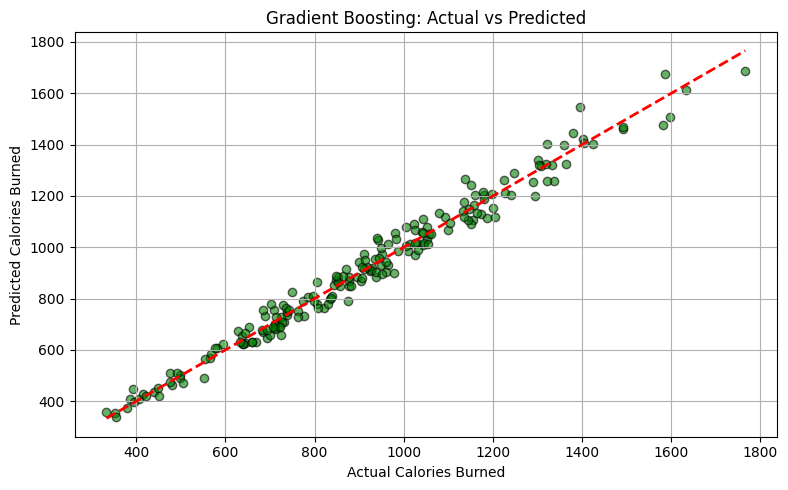

In [55]:
# Predict using the best model from GridSearchCV
gb_best_model = gb_grid.best_estimator_
gb_best_pred = gb_best_model.predict(X_test)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, gb_best_pred, color='green', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
# Prepare example input with encoded categorical features
example_data = pd.DataFrame([{
    'Age': 28,
    'Gender': 0,  # Male = 0
    'Weight (kg)': 70,
    'Height (m)': 1.75,
    'Max_BPM': 156,
    'Avg_BPM': 140,
    'Resting_BPM': 70,
    'Session_Duration (hours)': 1.5,
    'Workout_Type': 2,  # Cardio = 2
    'Experience_Level': 1
}])


# "Experience_Level": {'Beginner': 1, 'Intermediate': 2, 'Advanced': 3}
#data.replace({"Gender": {'Male': 0, 'Female': 1}}, inplace=True)
#data.replace({"Workout_Type": {'Yoga': 0, 'HIIT': 1, 'Cardio': 2, 'Strength': 3}}, inplace=True)



# Calculate engineered features
example_data['Max_BPM_Range'] = example_data['Max_BPM'] - example_data['Resting_BPM']
example_data['Avg_BPM_Range'] = example_data['Avg_BPM'] - example_data['Resting_BPM']

# Select features used for model training and ensure correct order
model_features = ['Gender', 'Age', 'Height (m)', 'Weight (kg)', 'Session_Duration (hours)',
                  'Avg_BPM_Range','Max_BPM_Range', 'Workout_Type', 'Experience_Level']

example_input = example_data[model_features]

# Predict
example_prediction = gb_grid.best_estimator_.predict(example_input)
print(f"Predicted Calories Burned: {example_prediction[0]:.2f} calories")

Predicted Calories Burned: 1136.30 calories
